# <center>Python Dataset Preparation and Analysis 2 by William Chaudoin</center>

In [16]:
# Installing libraries
import piplite
await piplite.install(['numpy'],['pandas'])

In [17]:
# Importing libraries and giving them specific names
import pandas as pd
import numpy as np

In [18]:
# Attaching dataset using javascript fetch library
# Dataset comes from Data.gov and details United States COVID-19 Cases and Deaths by State over Time
from js import fetch
import io

URL = "https://data.cdc.gov/api/views/9mfq-cb36/rows.csv"
resp = await fetch(URL)
other_path = io.BytesIO((await resp.arrayBuffer()).to_py())

In [19]:
# Reading file and attaching it to an object as a dataframe
df = pd.read_csv(other_path, header=None)

In [20]:
# Viewing dataframe
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
1,03/11/2021,KS,297229,241035,56194,0,0,4851,NaN,NaN,0,0,03/12/2021 03:20:13 PM,Agree,NaN
2,12/01/2021,ND,163565,135705,27860,589,220,1907,NaN,NaN,9,0,12/02/2021 02:35:20 PM,Agree,Not agree
3,01/02/2022,AS,11,NaN,NaN,0,0,0,NaN,NaN,0,0,01/03/2022 03:18:16 PM,NaN,NaN
4,11/22/2021,AL,841461,620483,220978,703,357,16377,12727,3650,7,3,11/22/2021 12:00:00 AM,Agree,Agree
5,05/30/2022,AK,251425,NaN,NaN,0,0,1252,NaN,NaN,0,0,05/31/2022 01:20:20 PM,NaN,NaN
6,05/17/2020,RMI,0,0,0,0,0,0,0,0,0,0,05/18/2020 04:01:54 PM,Agree,Agree
7,04/03/2020,ND,173,NaN,NaN,14,NaN,3,NaN,NaN,0,NaN,04/03/2020 04:22:39 PM,Agree,Not agree
8,09/04/2021,PR,173967,144788,29179,667,274,2911,2482,429,8,3,09/04/2021 12:00:00 AM,Agree,Agree
9,05/09/2021,PW,0,NaN,NaN,0,0,0,NaN,NaN,0,0,05/10/2021 02:15:36 PM,NaN,NaN


In [21]:
# Adjusting column names to row 0 and then dropping that row from the dataframe. Finally viewing the dataset to confirm change
df.columns=df.iloc[0]
df.drop([0], axis=0, inplace=True)
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
1,03/11/2021,KS,297229,241035,56194,0,0,4851,NaN,NaN,0,0,03/12/2021 03:20:13 PM,Agree,NaN
2,12/01/2021,ND,163565,135705,27860,589,220,1907,NaN,NaN,9,0,12/02/2021 02:35:20 PM,Agree,Not agree
3,01/02/2022,AS,11,NaN,NaN,0,0,0,NaN,NaN,0,0,01/03/2022 03:18:16 PM,NaN,NaN
4,11/22/2021,AL,841461,620483,220978,703,357,16377,12727,3650,7,3,11/22/2021 12:00:00 AM,Agree,Agree
5,05/30/2022,AK,251425,NaN,NaN,0,0,1252,NaN,NaN,0,0,05/31/2022 01:20:20 PM,NaN,NaN


In [22]:
# Checking df shape
df.shape

(60060, 15)

In [23]:
# Checking for null values
df.isnull().values.any()

True

In [24]:
# Identifying where those null values are located
df.isnull().sum()

0
submission_date        0
state                  0
tot_cases              0
conf_cases         26026
prob_cases         26098
new_case               0
pnew_case           3526
tot_death              0
conf_death         26787
prob_death         26787
new_death              0
pnew_death          3494
created_at             0
consent_cases      10015
consent_deaths      9009
dtype: int64

In [25]:
# Replacing null values with median of each variable
df['conf_cases'] = df['conf_cases'].fillna(df['conf_cases'].median())
df['prob_cases'] = df['prob_cases'].fillna(df['prob_cases'].median())
df['pnew_case'] = df['pnew_case'].fillna(df['pnew_case'].median())
df['conf_death'] = df['conf_death'].fillna(df['conf_death'].median())
df['prob_death'] = df['prob_death'].fillna(df['prob_death'].median())
df['pnew_death'] = df['pnew_death'].fillna(df['pnew_death'].median())

In [35]:
# Verifying numerical variables no longer contain null values
df.isnull().sum()

0
submission_date        0
state                  0
tot_cases              0
conf_cases             0
prob_cases             0
new_case               0
pnew_case              0
tot_death              0
conf_death             0
prob_death             0
new_death              0
pnew_death             0
created_at             0
consent_cases      10015
consent_deaths      9009
dtype: int64

In [38]:
# Viewing cleaned data
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
1,03/11/2021,KS,297229,241035,56194,0,0,4851,5193.0,309.0,0,0,03/12/2021 03:20:13 PM,Agree,NaN
2,12/01/2021,ND,163565,135705,27860,589,220,1907,5193.0,309.0,9,0,12/02/2021 02:35:20 PM,Agree,Not agree
3,01/02/2022,AS,11,299246.0,32175.0,0,0,0,5193.0,309.0,0,0,01/03/2022 03:18:16 PM,NaN,NaN
4,11/22/2021,AL,841461,620483,220978,703,357,16377,12727,3650,7,3,11/22/2021 12:00:00 AM,Agree,Agree
5,05/30/2022,AK,251425,299246.0,32175.0,0,0,1252,5193.0,309.0,0,0,05/31/2022 01:20:20 PM,NaN,NaN


In [36]:
# Gathering info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60060 entries, 1 to 60060
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  60060 non-null  object
 1   state            60060 non-null  object
 2   tot_cases        60060 non-null  object
 3   conf_cases       60060 non-null  object
 4   prob_cases       60060 non-null  object
 5   new_case         60060 non-null  object
 6   pnew_case        60060 non-null  object
 7   tot_death        60060 non-null  object
 8   conf_death       60060 non-null  object
 9   prob_death       60060 non-null  object
 10  new_death        60060 non-null  object
 11  pnew_death       60060 non-null  object
 12  created_at       60060 non-null  object
 13  consent_cases    50045 non-null  object
 14  consent_deaths   51051 non-null  object
dtypes: object(15)
memory usage: 3.4+ MB


In [39]:
# Changing data types
df['tot_cases'] = df['tot_cases'].astype(int)
df['conf_cases'] = df['conf_cases'].astype(int)
df['prob_cases'] = df['prob_cases'].astype(int)
df['new_case'] = df['new_case'].astype(int)
df['pnew_case'] = df['pnew_case'].astype(int)
df['tot_death'] = df['tot_death'].astype(int)
df['conf_death'] = df['conf_death'].astype(int)
df['prob_death'] = df['prob_death'].astype(int)
df['new_death'] = df['new_death'].astype(int)
df['pnew_death'] = df['pnew_death'].astype(int)


In [40]:
# Confirming change
df.dtypes

0
submission_date    object
state              object
tot_cases           int32
conf_cases          int32
prob_cases          int32
new_case            int32
pnew_case           int32
tot_death           int32
conf_death          int32
prob_death          int32
new_death           int32
pnew_death          int32
created_at         object
consent_cases      object
consent_deaths     object
dtype: object

In [43]:
# Describing data
df.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,6.006000e+04,6.006000e+04,60060.000000,60060.000000,60060.000000,60060.000000,60060.000000,60060.000000,60060.000000,60060.000000
mean,6.569641e+05,4.995929e+05,74688.262737,1601.409574,251.656843,9351.235648,7310.901515,743.471528,17.365335,1.719381
std,1.173490e+06,8.299557e+05,124480.943661,5074.263900,1397.689958,14591.369916,7993.680562,1217.186460,43.499174,23.813774
min,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-171804.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,1.830325e+04,2.187252e+05,17060.000000,3.000000,0.000000,361.000000,3878.000000,240.000000,0.000000,0.000000
50%,2.228415e+05,2.992460e+05,32175.000000,344.000000,1.000000,3241.000000,5193.000000,309.000000,3.000000,0.000000
75%,8.158552e+05,3.798208e+05,53761.750000,1435.000000,152.000000,12353.250000,6677.000000,387.000000,16.000000,0.000000
max,1.130924e+07,1.045879e+07,850445.000000,319809.000000,171617.000000,95604.000000,71408.000000,7889.000000,1178.000000,2919.000000


(array([49480.,  6330.,  2685.,   580.,   168.,   299.,   251.,    55.,
          106.,   106.]),
 array([       0. ,  1130923.7,  2261847.4,  3392771.1,  4523694.8,
         5654618.5,  6785542.2,  7916465.9,  9047389.6, 10178313.3,
        11309237. ]),
 <BarContainer object of 10 artists>)

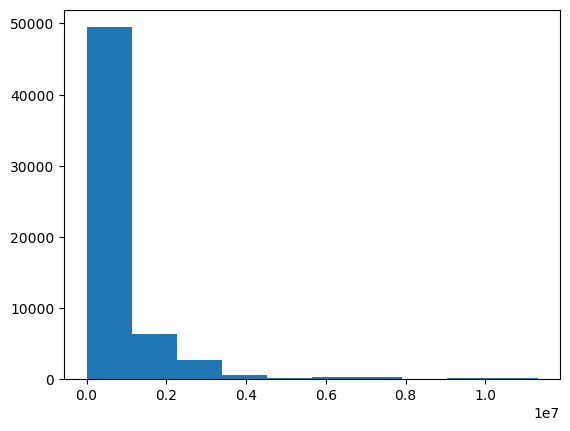

In [45]:
# Histogram of random variable
import matplotlib.pyplot as pyplot
pyplot.hist(df['tot_cases'])

In [47]:
# Saving new dataset as a csv
df.to_csv("covid.csv", index=False)